### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

AUTOCORRELAZIONE LIQUIDO

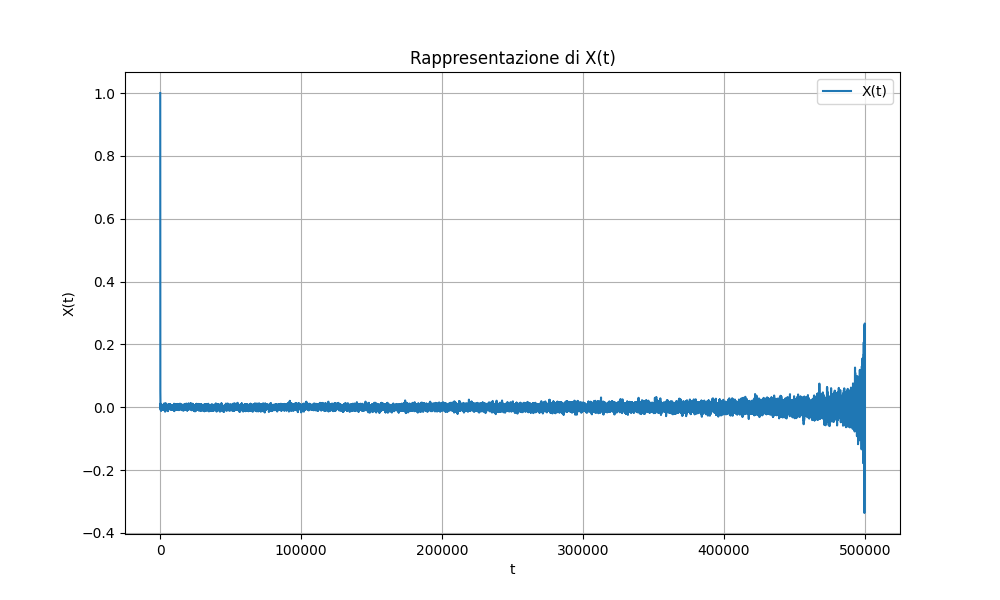

In [3]:
from IPython.display import Image, display

# Percorso dell'immagine
image_path = r'C:\Users\Utente\Pictures\Saved Pictures\autocorr_liquid.png'

# Visualizzazione dell'immagine
display(Image(filename=image_path))

**AUTOCORRELAZIONE SOLIDO**

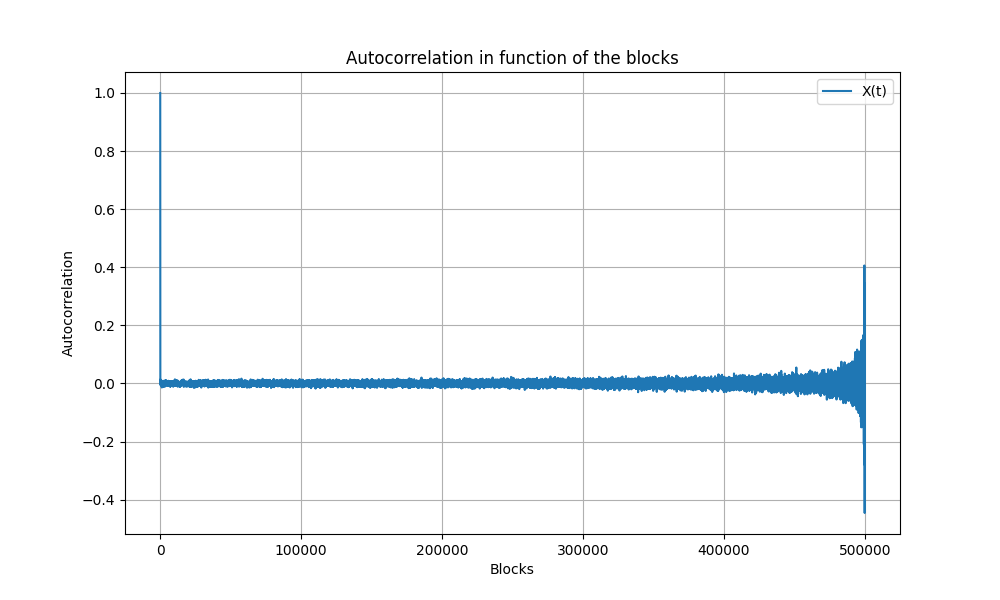

In [5]:
# Percorso dell'immagine
image_path = r'C:\Users\Utente\Pictures\Saved Pictures\atucorr_solid.png'

# Visualizzazione dell'immagine
display(Image(filename=image_path))

**AUTOCORRELAZIONE GAS**

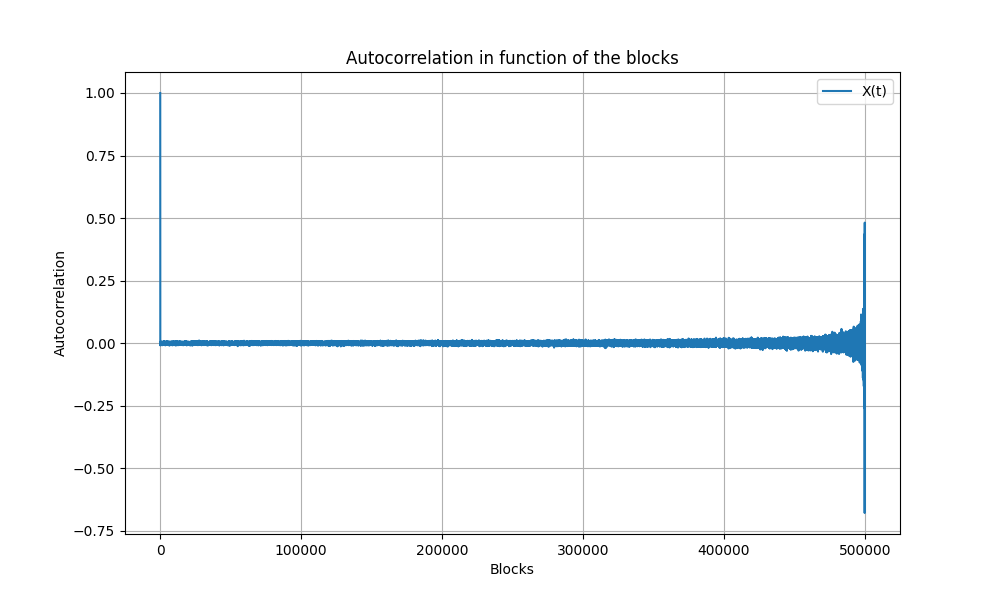

In [7]:
# Percorso dell'immagine
image_path = r'C:\Users\Utente\Pictures\Saved Pictures\autocorr_gas.png'

# Visualizzazione dell'immagine
display(Image(filename=image_path))

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Utente\AppData\Local\Temp\ipykernel_3840\752573895.py:25: SyntaxWarning: invalid escape sequence '\s'
  data_liquid = pd.read_csv(file_path_liquid, sep='\s+', header=None, skiprows=1, usecols=[1])
C:\Users\Utente\AppData\Local\Temp\ipykernel_3840\752573895.py:28: SyntaxWarning: invalid escape sequence '\s'
  data_solid = pd.read_csv(file_path_solid, sep='\s+', header=None, skiprows=1, usecols=[1])
C:\Users\Utente\AppData\Local\Temp\ipykernel_3840\752573895.py:31: SyntaxWarning: invalid escape sequence '\s'
  data_gas = pd.read_csv(file_path_gas, sep='\s+', header=None, skiprows=1, usecols=[1])


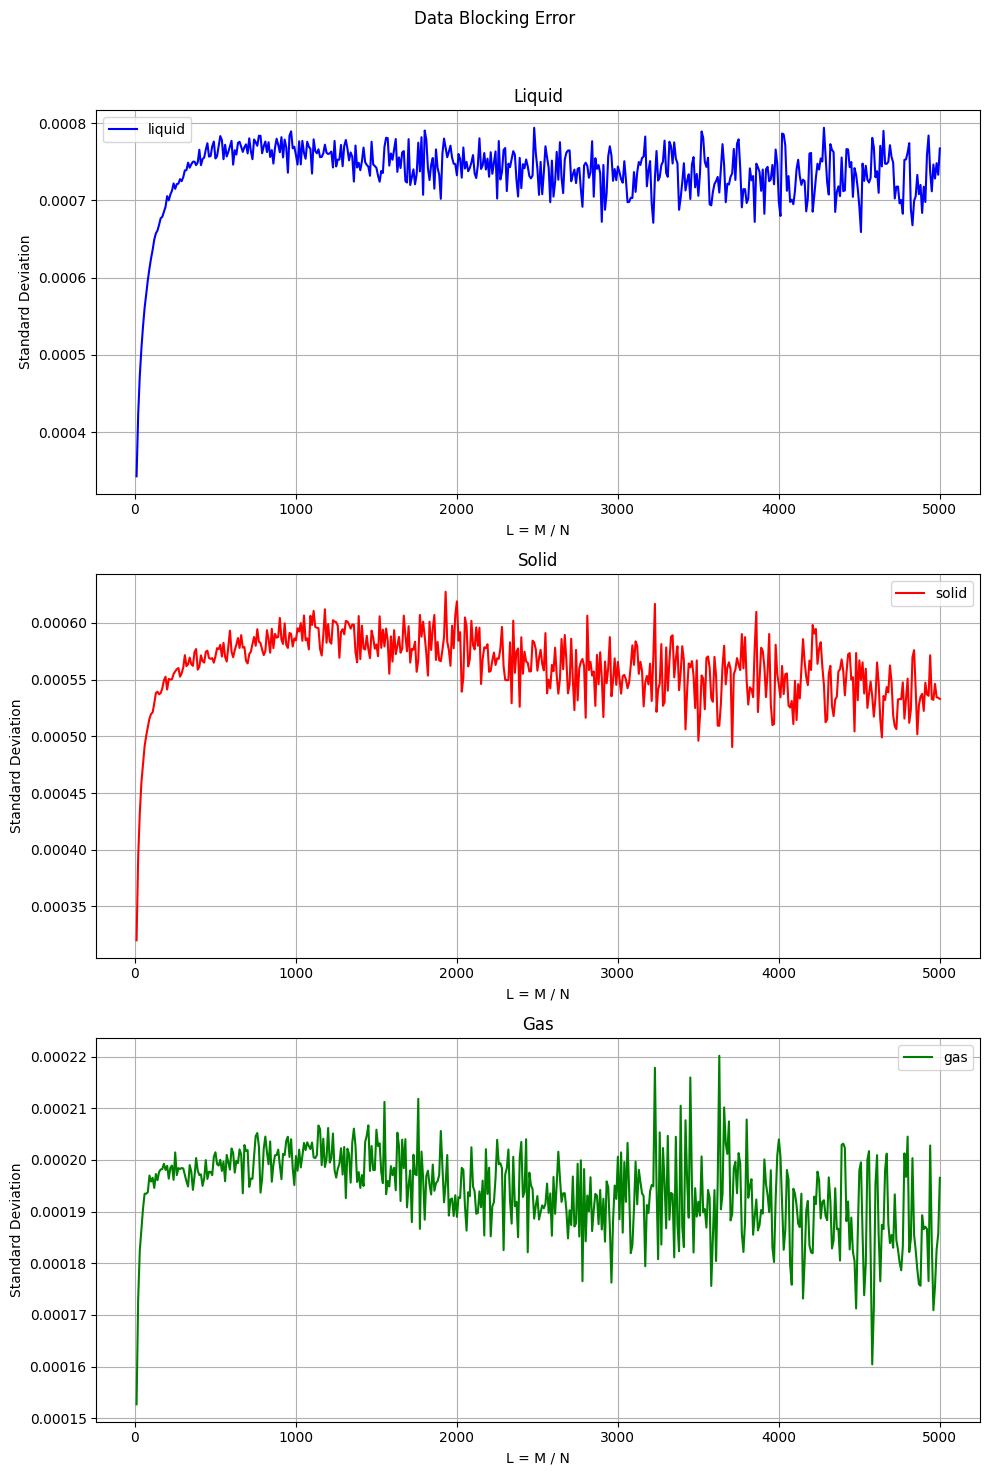

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definire i percorsi dei file
file_path_liquid = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\potential_energy_liquid.dat'
file_path_solid = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\potential_energy_solid.dat'
file_path_gas = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\potential_energy_gas.dat'

# Funzione per calcolare l'errore
def error(x, L):
    M = len(x)  # Numero di dati
    N = int(M / L)  # Numero di blocchi
    mean = []
    for i in range(N):
        start_index = int(i * L)
        end_index = int((i + 1) * L)
        block = x[start_index:end_index]
        block_mean = np.mean(block)
        mean.append(block_mean)
    err = np.sqrt(np.var(mean) / N)
    return err

# Leggere i valori di m(t) dai file, saltando la prima riga e considerando solo la seconda colonna
data_liquid = pd.read_csv(file_path_liquid, sep='\s+', header=None, skiprows=1, usecols=[1])
liquid = data_liquid[1].values

data_solid = pd.read_csv(file_path_solid, sep='\s+', header=None, skiprows=1, usecols=[1])
solid = data_solid[1].values

data_gas = pd.read_csv(file_path_gas, sep='\s+', header=None, skiprows=1, usecols=[1])
gas = data_gas[1].values

# Calcolare gli errori per vari blocchi di lunghezza
N = np.linspace(10, 5000, 500, dtype=int)  # Convertire in int per garantire valori interi
err_liquid = [error(liquid, L) for L in N]
err_solid = [error(solid, L) for L in N]
err_gas = [error(gas, L) for L in N]

# Creare il plot
x = N
plt.figure(figsize=(10, 15))

plt.suptitle("Data Blocking Error")

# Plot per il liquido
plt.subplot(3, 1, 1)
plt.title("Liquid")
plt.xlabel("L = M / N")
plt.ylabel("Standard Deviation")
plt.grid()
plt.plot(x, err_liquid, label="liquid", color='b')
plt.legend()

# Plot per il solido
plt.subplot(3, 1, 2)
plt.title("Solid")
plt.xlabel("L = M / N")
plt.ylabel("Standard Deviation")
plt.grid()
plt.plot(x, err_solid, label="solid", color='r')
plt.legend()

# Plot per il gas
plt.subplot(3, 1, 3)
plt.title("Gas")
plt.xlabel("L = M / N")
plt.ylabel("Standard Deviation")
plt.grid()
plt.plot(x, err_gas, label="gas", color='g')
plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Per tutte e 3 le fasi si nota che l'errore inizia a saturarsi intorno a blocchi di lunghezza 1000 steps

**LIQUID, SOLID AND GAS GOFR**

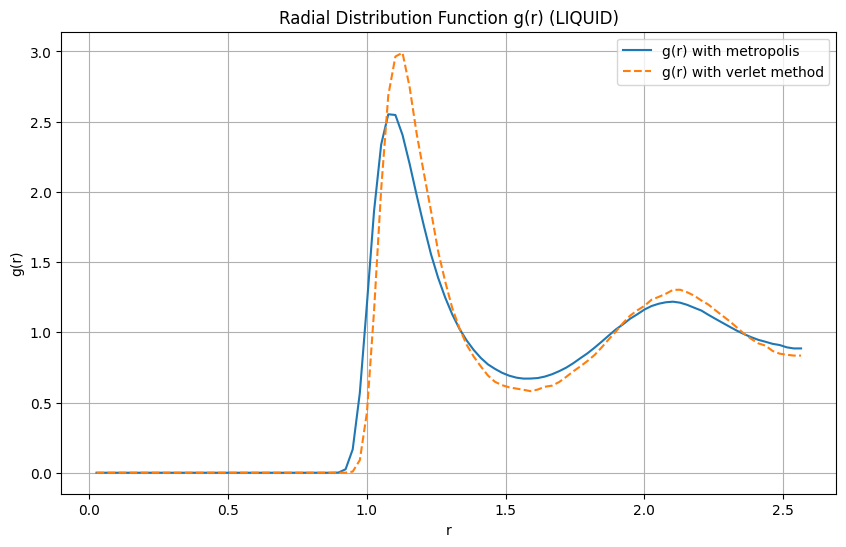

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Percorsi ai file
file_path_gofr_metr = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\liquid_phase\gofr_metropolis.txt'
file_path_gofr_verlet = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\liquid_phase\gofr_verlet.txt'

# Leggere i dati dal file gofr_metr
data_gofr_metr = np.loadtxt(file_path_gofr_metr)
r_metr = data_gofr_metr[:, 0]
gofr_metr = data_gofr_metr[:, 1]
#error_metr = data_gofr_metr[:, 2]  # Se ci sono errori

# Leggere i dati dal file gofr_verlet
data_gofr_verlet = np.loadtxt(file_path_gofr_verlet)
r_verlet = data_gofr_verlet[:, 0]
gofr_verlet = data_gofr_verlet[:, 1]
#error_verlet = data_gofr_verlet[:, 2]  # Se ci sono errori

# Creare il plot
plt.figure(figsize=(10, 6))

# Plot dei dati gofr_metr
#plt.errorbar(r_metr, gofr_metr, yerr=error_metr, fmt='o', ecolor='r', capsize=5, label='g(r) with metropolis error bars')
plt.plot(r_metr, gofr_metr, label='g(r) with metropolis')

# Plot dei dati gofr_verlet
#plt.errorbar(r_verlet, gofr_verlet, yerr=error_verlet, fmt='o', ecolor='b', capsize=5, label='g(r) with other method error bars')
plt.plot(r_verlet, gofr_verlet, label='g(r) with verlet method', linestyle='--')

# Impostazioni del grafico
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function g(r) (LIQUID)')
plt.legend()
plt.grid(True)
plt.show()


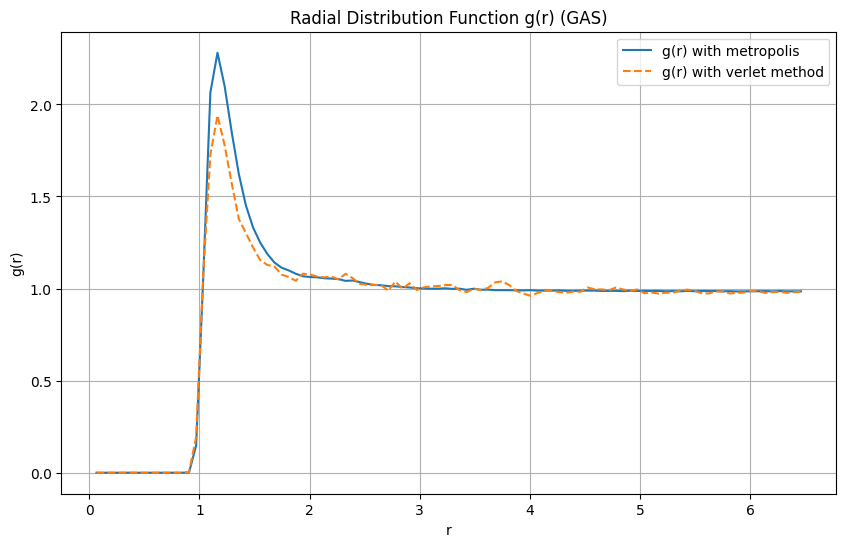

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Percorsi ai file
file_path_gofr_metr = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\gas_phase\gofr_metropolis.txt'
file_path_gofr_verlet = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\gas_phase\gofr_verlet.txt'

# Leggere i dati dal file gofr_metr
data_gofr_metr = np.loadtxt(file_path_gofr_metr)
r_metr = data_gofr_metr[:, 0]
gofr_metr = data_gofr_metr[:, 1]
#error_metr = data_gofr_metr[:, 2]  # Se ci sono errori

# Leggere i dati dal file gofr_verlet
data_gofr_verlet = np.loadtxt(file_path_gofr_verlet)
r_verlet = data_gofr_verlet[:, 0]
gofr_verlet = data_gofr_verlet[:, 1]
#error_verlet = data_gofr_verlet[:, 2]  # Se ci sono errori

# Creare il plot
plt.figure(figsize=(10, 6))

# Plot dei dati gofr_metr
#plt.errorbar(r_metr, gofr_metr, yerr=error_metr, fmt='o', ecolor='r', capsize=5, label='g(r) with metropolis error bars')
plt.plot(r_metr, gofr_metr, label='g(r) with metropolis')

# Plot dei dati gofr_verlet
#plt.errorbar(r_verlet, gofr_verlet, yerr=error_verlet, fmt='o', ecolor='b', capsize=5, label='g(r) with other method error bars')
plt.plot(r_verlet, gofr_verlet, label='g(r) with verlet method', linestyle='--')

# Impostazioni del grafico
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function g(r) (GAS)')
plt.legend()
plt.grid(True)
plt.show()


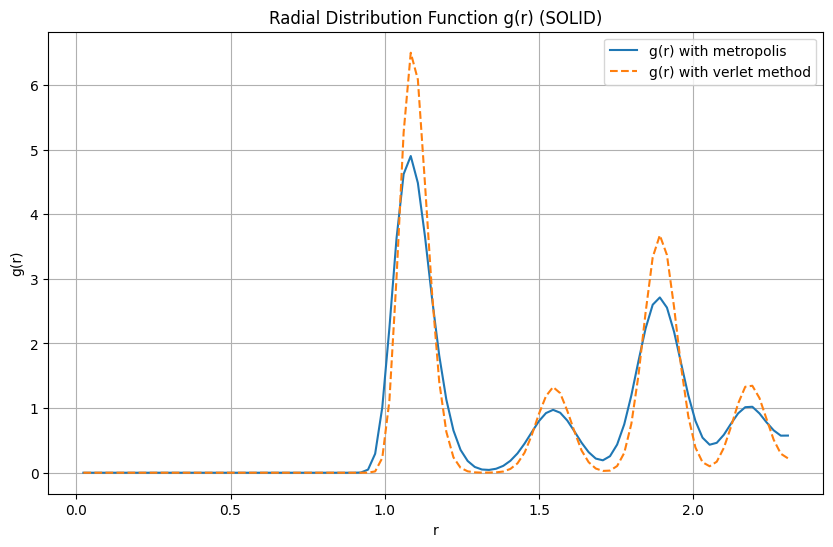

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Percorsi ai file
file_path_gofr_metr = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\solid_phase\gofr_metropolis.txt'
file_path_gofr_verlet = r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\solid_phase\gofr_verlet.txt'

# Leggere i dati dal file gofr_metr
data_gofr_metr = np.loadtxt(file_path_gofr_metr)
r_metr = data_gofr_metr[:, 0]
gofr_metr = data_gofr_metr[:, 1]
#error_metr = data_gofr_metr[:, 2]  # Se ci sono errori

# Leggere i dati dal file gofr_verlet
data_gofr_verlet = np.loadtxt(file_path_gofr_verlet)
r_verlet = data_gofr_verlet[:, 0]
gofr_verlet = data_gofr_verlet[:, 1]
#error_verlet = data_gofr_verlet[:, 2]  # Se ci sono errori

# Creare il plot
plt.figure(figsize=(10, 6))

# Plot dei dati gofr_metr
#plt.errorbar(r_metr, gofr_metr, yerr=error_metr, fmt='o', ecolor='r', capsize=5, label='g(r) with metropolis error bars')
plt.plot(r_metr, gofr_metr, label='g(r) with metropolis')

# Plot dei dati gofr_verlet
#plt.errorbar(r_verlet, gofr_verlet, yerr=error_verlet, fmt='o', ecolor='b', capsize=5, label='g(r) with other method error bars')
plt.plot(r_verlet, gofr_verlet, label='g(r) with verlet method', linestyle='--')

# Impostazioni del grafico
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function g(r) (SOLID)')
plt.legend()
plt.grid(True)
plt.show()


### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

**LIQUID PHASE**

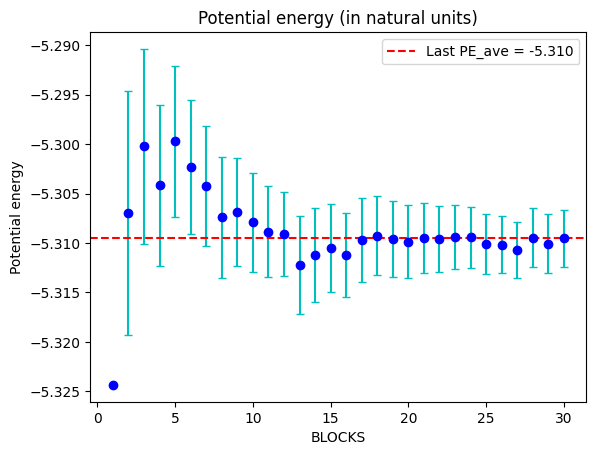

In [8]:
# Leggi i dati dal file
PE = np.loadtxt(r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\liquid_phase\P_E.txt', skiprows=1)  # Salta la riga dell'intestazione

# Estrai i valori delle colonne
PE_ave = PE[:, 2]
err_PE = PE[:, 3]
block = PE[:, 0]

# Crea l'errore plot
plt.errorbar(block, PE_ave, yerr=err_PE, fmt='o', capsize=3, color='blue', ecolor='c', markersize=6)

# Aggiungi la linea orizzontale in corrispondenza dell'ultimo valore di PE_ave
plt.axhline(y=PE_ave[-1], color='r', linestyle='--', label=f'Last PE_ave = {PE_ave[-1]:.3f}')

# Aggiungi etichette agli assi e un titolo al grafico
plt.xlabel('BLOCKS')
plt.ylabel('Potential energy')
plt.title('Potential energy (in natural units)')
plt.legend()

# Mostra il grafico
plt.show()


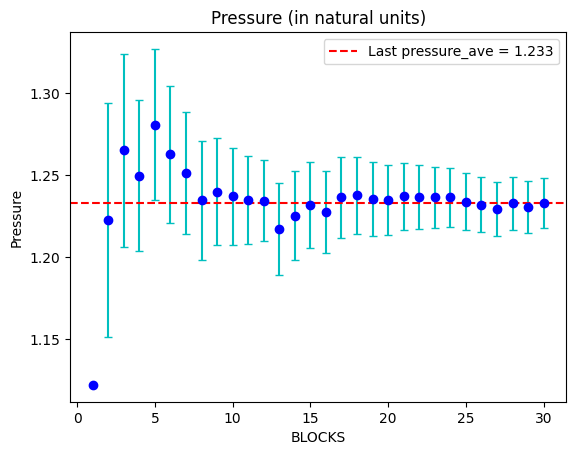

In [13]:
# Leggi i dati dal file
pressure = np.loadtxt(r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\liquid_phase\pressure.txt', skiprows=1)  # Salta la riga dell'intestazione

# Estrai i valori delle colonne
pressure_ave = pressure[:, 2]
err_pressure = pressure[:, 3]
block = pressure[:, 0]

# Crea l'erroreplot
plt.errorbar(block, pressure_ave, yerr=err_pressure, fmt='o', capsize=3, color='blue', ecolor='c', markersize=6)

plt.axhline(y=pressure_ave[-1], color='r', linestyle='--', label=f'Last pressure_ave = {pressure_ave[-1]:.3f}')

# Aggiungi etichette agli assi e un titolo al grafico
plt.xlabel('BLOCKS')
plt.ylabel('Pressure')
plt.title('Pressure (in natural units)')
plt.legend()

# Mostra il grafico
plt.show()

**SOLID PHASE**

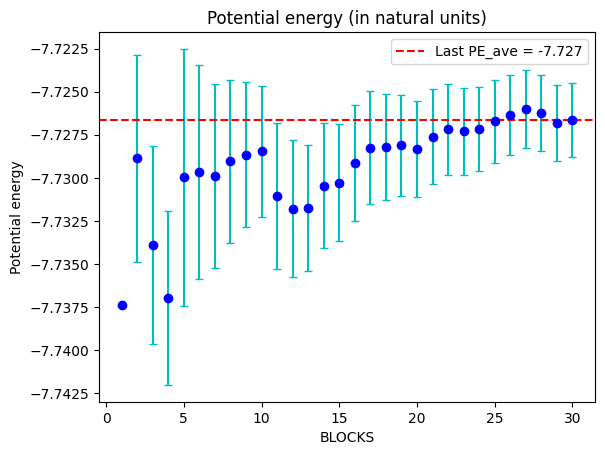

In [9]:
# Leggi i dati dal file
PE = np.loadtxt(r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\solid_phase\P_E.txt', skiprows=1)  # Salta la riga dell'intestazione

# Estrai i valori delle colonne
PE_ave = PE[:, 2]
err_PE = PE[:, 3]
block = PE[:, 0]

# Crea l'errore plot
plt.errorbar(block, PE_ave, yerr=err_PE, fmt='o', capsize=3, color='blue', ecolor='c', markersize=6)

# Aggiungi la linea orizzontale in corrispondenza dell'ultimo valore di PE_ave
plt.axhline(y=PE_ave[-1], color='r', linestyle='--', label=f'Last PE_ave = {PE_ave[-1]:.3f}')

# Aggiungi etichette agli assi e un titolo al grafico
plt.xlabel('BLOCKS')
plt.ylabel('Potential energy')
plt.title('Potential energy (in natural units)')
plt.legend()

# Mostra il grafico
plt.show()


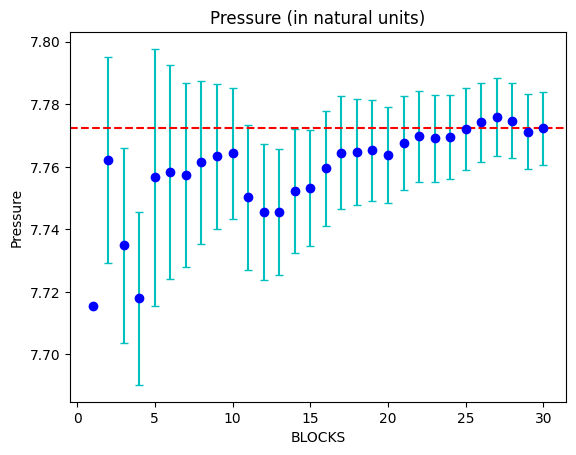

In [10]:
# Leggi i dati dal file
pressure = np.loadtxt(r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\solid_phase\pressure.txt', skiprows=1)  # Salta la riga dell'intestazione

# Estrai i valori delle colonne
pressure_ave = pressure[:, 2]
err_pressure = pressure[:, 3]
block = pressure[:, 0]

# Crea l'erroreplot
plt.errorbar(block, pressure_ave, yerr=err_pressure, fmt='o', capsize=3, color='blue', ecolor='c', markersize=6)

plt.axhline(y=pressure_ave[-1], color='r', linestyle='--', label=f'Last pressure_ave = {pressure_ave[-1]:.3f}')

# Aggiungi etichette agli assi e un titolo al grafico
plt.xlabel('BLOCKS')
plt.ylabel('Pressure')
plt.title('Pressure (in natural units)')

# Mostra il grafico
plt.show()

**GAS PHASE**

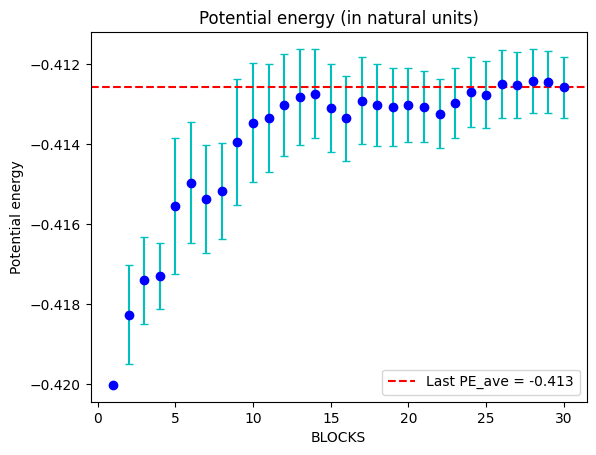

In [11]:
# Leggi i dati dal file
PE = np.loadtxt(r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\gas_phase\P_E.txt', skiprows=1)  # Salta la riga dell'intestazione

# Estrai i valori delle colonne
PE_ave = PE[:, 2]
err_PE = PE[:, 3]
block = PE[:, 0]

# Crea l'errore plot
plt.errorbar(block, PE_ave, yerr=err_PE, fmt='o', capsize=3, color='blue', ecolor='c', markersize=6)

# Aggiungi la linea orizzontale in corrispondenza dell'ultimo valore di PE_ave
plt.axhline(y=PE_ave[-1], color='r', linestyle='--', label=f'Last PE_ave = {PE_ave[-1]:.3f}')

# Aggiungi etichette agli assi e un titolo al grafico
plt.xlabel('BLOCKS')
plt.ylabel('Potential energy')
plt.title('Potential energy (in natural units)')
plt.legend()

# Mostra il grafico
plt.show()


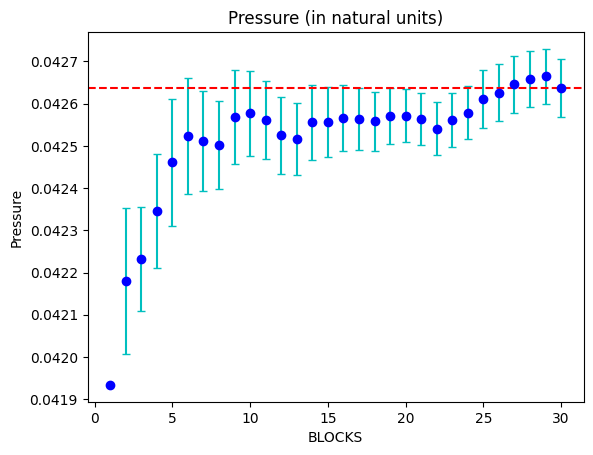

In [12]:
# Leggi i dati dal file
pressure = np.loadtxt(r'C:\Users\Utente\Documents\Python Scripts\lezione_7\lez7_2\gas_phase\pressure.txt', skiprows=1)  # Salta la riga dell'intestazione

# Estrai i valori delle colonne
pressure_ave = pressure[:, 2]
err_pressure = pressure[:, 3]
block = pressure[:, 0]

# Crea l'erroreplot
plt.errorbar(block, pressure_ave, yerr=err_pressure, fmt='o', capsize=3, color='blue', ecolor='c', markersize=6)

plt.axhline(y=pressure_ave[-1], color='r', linestyle='--', label=f'Last pressure_ave = {pressure_ave[-1]:.3f}')

# Aggiungi etichette agli assi e un titolo al grafico
plt.xlabel('BLOCKS')
plt.ylabel('Pressure')
plt.title('Pressure (in natural units)')

# Mostra il grafico
plt.show()